In [8]:
import numpy as np
import matplotlib.pyplot as plt


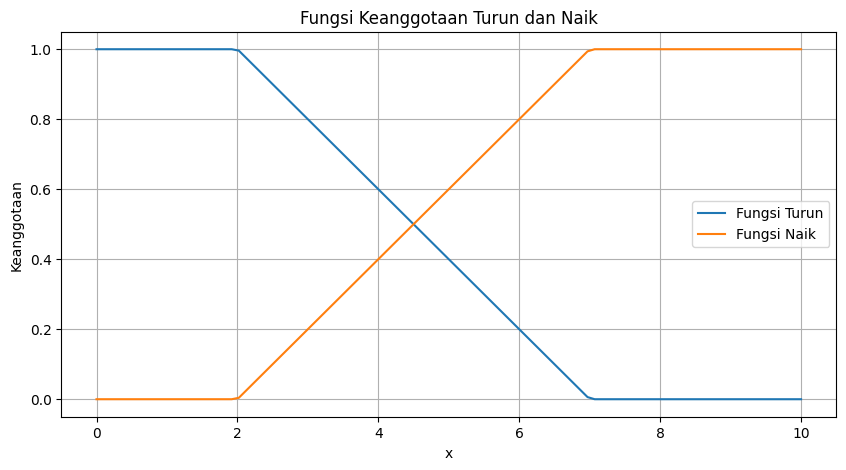

In [9]:
def turun(x, a, b):
    """Fungsi turun"""
    return np.maximum(0, np.minimum(1, (b - x) / (b - a)))

def naik(x, a, b):
    """Fungsi naik"""
    return np.maximum(0, np.minimum(1, (x - a) / (b - a)))

# Visualisasi
x = np.linspace(0, 10, 100)

plt.figure(figsize=(10, 5))
plt.plot(x, turun(x, 2, 7), label="Fungsi Turun")
plt.plot(x, naik(x, 2, 7), label="Fungsi Naik")
plt.title("Fungsi Keanggotaan Turun dan Naik")
plt.xlabel("x")
plt.ylabel("Keanggotaan")
plt.legend()
plt.grid()
plt.show()


In [4]:
# Kecepatan Pelayanan
class Speed(BaseFuzzy):  
    def __init__(self):
        self.min_value = 0
        self.max_value = 10

    def slow(self, x):
        return self.down(x)

    def medium(self, x):
        return max(0, min(1, (x - 3) / 2 if x <= 5 else (7 - x) / 2))

    def fast(self, x):
        return self.up(x)

# Kualitas Makanan
class FoodQuality(BaseFuzzy):  
    def __init__(self):
        self.min_value = 0
        self.max_value = 10

    def bad(self, x):
        return self.down(x)

    def average(self, x):
        return max(0, min(1, (x - 3) / 2 if x <= 5 else (7 - x) / 2))

    def good(self, x):
        return self.up(x)

# Suasana Restoran
class Atmosphere(BaseFuzzy):  
    def __init__(self):
        self.min_value = 0
        self.max_value = 10

    def uncomfortable(self, x):
        return self.down(x)

    def neutral(self, x):
        return max(0, min(1, (x - 3) / 2 if x <= 5 else (7 - x) / 2))

    def comfortable(self, x):
        return self.up(x)


In [5]:
# Tingkat Kebahagiaan
class Happiness(BaseFuzzy):  
    def __init__(self):
        self.min_value = 0
        self.max_value = 10

    def not_satisfied(self, f):
        return self.max_value - f * (self.max_value - self.min_value)

    def satisfied(self, f):
        return f * (self.max_value - self.min_value)

    def very_satisfied(self, f):
        return f * (self.max_value - self.min_value) + 5


In [6]:
def evaluate_happiness(speed, quality, atmosphere):
    # Aturan fuzzy
    rules = {
        ('slow', 'bad', 'uncomfortable'): 'not_satisfied',
        ('medium', 'average', 'neutral'): 'satisfied',
        ('fast', 'good', 'comfortable'): 'very_satisfied',
    }

    happiness = Happiness()
    speed_fuzzy = Speed()
    food_fuzzy = FoodQuality()
    atmosphere_fuzzy = Atmosphere()

    speed_scores = {
        'slow': speed_fuzzy.slow(speed),
        'medium': speed_fuzzy.medium(speed),
        'fast': speed_fuzzy.fast(speed),
    }

    food_scores = {
        'bad': food_fuzzy.bad(quality),
        'average': food_fuzzy.average(quality),
        'good': food_fuzzy.good(quality),
    }

    atmosphere_scores = {
        'uncomfortable': atmosphere_fuzzy.uncomfortable(atmosphere),
        'neutral': atmosphere_fuzzy.neutral(atmosphere),
        'comfortable': atmosphere_fuzzy.comfortable(atmosphere),
    }

    fuzzy_real = 0
    fuzzy = 0
    for (speed_key, food_key, atmosphere_key), happiness_key in rules.items():
        fuzzy_value = min(
            speed_scores[speed_key],
            food_scores[food_key],
            atmosphere_scores[atmosphere_key]
        )
        if happiness_key == 'not_satisfied':
            real_value = happiness.not_satisfied(fuzzy_value)
        elif happiness_key == 'satisfied':
            real_value = happiness.satisfied(fuzzy_value)
        else:
            real_value = happiness.very_satisfied(fuzzy_value)
        
        fuzzy_real += fuzzy_value * real_value
        fuzzy += fuzzy_value

    final_happiness = fuzzy_real / fuzzy if fuzzy > 0 else 0
    return round(final_happiness, 2)


In [7]:
# Input Parameter
speed = 8  # Kecepatan Pelayanan
quality = 7  # Kualitas Makanan
atmosphere = 6  # Suasana Restoran

# Evaluasi Kebahagiaan
result = evaluate_happiness(speed, quality, atmosphere)
print(f"Tingkat kebahagiaan pelanggan: {result} (skala 0-10)")


Tingkat kebahagiaan pelanggan: 10.25 (skala 0-10)
